In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_index=pd.read_csv('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/Rui_final_notebooks/df_ready_for_index.csv')

In [21]:
print(df_index.dtypes)

Date                object
Statement           object
Name_of_Speaker     object
Sentiment          float64
Position            object
dtype: object


In [22]:
df_index

,Date,Statement,Name_of_Speaker,Sentiment,Position
0,2022-09-30,"At a conference in Florence, Banca d'Italia Go...",Mario Centeno,-1.0,Governor
1,2022-09-30,Banca d'Italia Governor Ignazio Visco on Fri...,Ignazio Visco,-1.0,Governor
2,2022-09-30,ECB Executive Board Member Isabel Schnabel ...,Isabel Schnabel,1.0,Executive Council
3,2022-09-30,In a speech organised by the Florence School o...,Ignazio Visco,1.0,Governor
4,2022-09-30,"According to first estimates, euro area inflat...",Christine Lagarde,1.0,Executive Council
...,...,...,...,...,...
30163,2023-02-02,The Governing Council will stay the course in ...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30164,2022-12-15,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30165,2022-10-27,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30166,2022-09-08,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement


In [16]:
df_index.reset_index(drop=True, inplace=True)

# Average per Speaker, per month.

In [99]:
# Filter the DataFrame to only include data up to December 2023
df_filtered = df_index[df_index.index <= '2023-12-31']

# Group by 'Name_of_Speaker' and month, then calculate the average sentiment
average_sentiment = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(freq='M')])['Sentiment'].mean().reset_index()

# Optionally, format the 'Month' column to a more readable format
average_sentiment['Month'] = average_sentiment['Date'].dt.strftime('%Y-%m')

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_3908/2197010708.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_sentiment = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(freq='M')])['Sentiment'].mean().reset_index()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

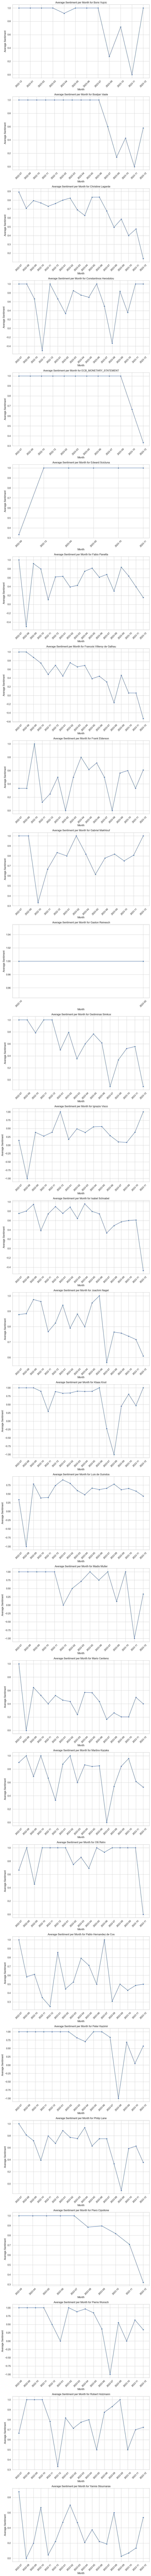

In [100]:
# Set the plotting style
sns.set(style="whitegrid")

# Get unique speakers
unique_speakers = average_sentiment['Name_of_Speaker'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(len(unique_speakers), 1, figsize=(10, 6 * len(unique_speakers)))

# If there's only one speaker, wrap axes in a list for consistent handling
if len(unique_speakers) == 1:
    axes = [axes]

# Loop over each speaker and create a separate plot
for ax, speaker in zip(axes, unique_speakers):
    speaker_data = average_sentiment[average_sentiment['Name_of_Speaker'] == speaker]
    sns.lineplot(data=speaker_data, x='Month', y='Sentiment', ax=ax, marker='o', color='b')
    ax.set_title(f'Average Sentiment per Month for {speaker}')
    ax.set_ylabel('Average Sentiment')
    ax.set_xlabel('Month')
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Attempt at regressing

In [101]:
# Filter out rows where the 'Position' column equals 'Monetary Policy Statement'
df_filtered = df_index[df_index['Position'] != 'Monetary Policy Statement']

# Filter the DataFrame to only include data up to December 31, 2023
df_filtered = df_filtered[df_filtered.index <= '2023-12-31']
# Display the filtered DataFrame
df_filtered

# Sort by date
df_filtered.sort_values(by='Date', inplace=True)
df_filtered

,Statement,Name_of_Speaker,Sentiment,Position
Date,,,,
2022-07-02,Euro area inflation has increased to a record ...,Christine Lagarde,1.0,Executive Council
2022-07-02,New figures from the statistics agency Eurosta...,Christine Lagarde,1.0,Executive Council
2022-07-04,"At the Frankfurt Euro Finance Summit, ECB Vi...",Christine Lagarde,1.0,Executive Council
2022-07-04,"In an op-ed for Público, Lisbon School of Econ...",Christine Lagarde,1.0,Executive Council
2022-07-04,"In the future, climate protection is to play a...",Christine Lagarde,1.0,Executive Council
...,...,...,...,...
2023-12-31,"Since its introduction on 1 January 1999, the ...",Christine Lagarde,1.0,Executive Council
2023-12-31,"Since its introduction on 1 January 1999, the ...",Christine Lagarde,1.0,Executive Council
2023-12-31,An editorial examines the outlook for 2024. At...,Christine Lagarde,1.0,Executive Council


In [117]:
# Calculate average sentiment per speaker per month
average_sentiment_per_speaker = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(freq='M')])['Sentiment'].mean().unstack(0)

# Add a 'Month' column
average_sentiment_per_speaker['Month'] = average_sentiment_per_speaker.index.strftime('%Y-%m')

average_sentiment_per_speaker

average_sentiment_per_speaker.to_csv('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/Rui_final_notebooks/average_sentiment_per_speaker.csv')


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_3908/3141291903.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_sentiment_per_speaker = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(freq='M')])['Sentiment'].mean().unstack(0)


In [128]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/Rui_final_notebooks/average_sentiment_per_speaker.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

data

,Date,Boris Vujcic,Bostjan Vasle,Christine Lagarde,Constantinos Herodotou,Edward Scicluna,Fabio Panetta,Francois Villeroy de Galhau,Frank Elderson,Gabriel Makhlouf,...,Martins Kazaks,Olli Rehn,Pablo Hernandez de Cos,Peter Kazimir,Philip Lane,Piero Cipollone,Pierre Wunsch,Robert Holzmann,Yannis Stournaras,Month
0,2022-07-31,NaN,1.000000,0.892562,1.000000,NaN,1.000000,1.000000,0.333333,1.000000,...,0.900000,0.666667,1.000000,1.000000,1.000000,NaN,NaN,0.666667,0.875000,2022-07
1,2022-08-31,NaN,NaN,0.709091,NaN,NaN,-0.500000,1.000000,NaN,NaN,...,1.000000,1.000000,NaN,NaN,0.813953,NaN,1.000000,1.000000,0.000000,2022-08
2,2022-09-30,NaN,1.000000,0.794840,1.000000,0.333333,0.916667,0.875000,0.333333,1.000000,...,0.692308,0.454545,0.583333,1.000000,0.717391,1.000000,1.000000,1.000000,0.200000,2022-09
3,2022-10-31,NaN,1.000000,0.769122,0.666667,NaN,0.795918,0.743590,1.000000,0.333333,...,1.000000,1.000000,0.611111,1.000000,0.391304,NaN,1.000000,1.000000,0.666667,2022-10
4,2022-11-30,NaN,1.000000,0.730887,-0.500000,NaN,0.106383,0.484848,0.125000,0.666667,...,0.666667,1.000000,0.349398,1.000000,0.797101,NaN,1.000000,0.782609,0.045455,2022-11
5,2022-12-31,1.000000,1.000000,0.761842,1.000000,1.000000,0.619048,0.692308,0.250000,0.833333,...,0.333333,1.000000,0.250000,1.000000,0.672727,NaN,0.500000,0.333333,0.222222,2022-12
6,2023-01-31,1.000000,NaN,0.800738,0.666667,NaN,0.632653,0.448276,0.500000,0.800000,...,0.875000,1.000000,0.857143,1.000000,0.886364,NaN,0.000000,0.818182,0.473684,2023-01
7,2023-02-28,1.000000,1.000000,0.823418,0.333333,NaN,0.391304,0.750000,0.000000,1.000000,...,1.000000,0.750000,0.447368,1.000000,0.773585,NaN,1.000000,0.714286,0.700000,2023-02
8,2023-03-31,1.000000,1.000000,0.690329,0.850000,NaN,0.428571,0.657895,0.500000,NaN,...,0.600000,0.857143,0.523810,0.818182,0.753521,NaN,0.880952,0.775510,0.468750,2023-03
9,2023-04-30,0.920000,1.000000,0.626582,0.750000,1.000000,0.744681,0.689655,0.800000,0.818182,...,0.863636,0.692308,0.791667,0.705882,0.934911,1.000000,0.963636,0.800000,0.208333,2023-04


# Aggregrating per ecb policy statement

In [23]:
filtered_df = df_index[df_index['Position'] == 'Monetary Policy Statement']
filtered_df


,Date,Statement,Name_of_Speaker,Sentiment,Position
30154,2024-03-07,The Governing Council today decided to keep th...,ECB_MONETARY_STATEMENT,0.000000,Monetary Policy Statement
30155,2024-01-25,The Governing Council today decided to keep th...,ECB_MONETARY_STATEMENT,0.666667,Monetary Policy Statement
30156,2023-12-14,The Governing Council today decided to keep th...,ECB_MONETARY_STATEMENT,0.333333,Monetary Policy Statement
30157,2023-10-26,The Governing Council today decided to keep th...,ECB_MONETARY_STATEMENT,0.666667,Monetary Policy Statement
30158,2023-09-14,Inflation continues to decline but is still ex...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement
30159,2023-07-27,Inflation continues to decline but is still ex...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement
30160,2023-06-15,Inflation has been coming down but is projecte...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement
30161,2023-05-04,The inflation outlook continues to be too high...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement
30162,2023-03-16,Inflation is projected to remain too high for ...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement
30163,2023-02-02,The Governing Council will stay the course in ...,ECB_MONETARY_STATEMENT,1.000000,Monetary Policy Statement


In [41]:
# Given dates
dates = [
 '2023-12-14','2023-10-26', '2023-09-14', 
    '2023-07-27', '2023-06-15', '2023-05-04', '2023-03-16', '2023-02-02', 
    '2022-12-15', '2022-10-27', '2022-09-08', '2022-07-21'
]
date_df = pd.DataFrame({'Date': pd.to_datetime(dates)})

# Filter the DataFrame to only include data up to December 2023
df_index = df_index[df_index['Position'] != 'Monetary Policy Statement']


In [42]:
# Function to find the period for each date in df_index
def find_period(date, periods):
    for i in range(len(periods) - 1):
        if periods[i] <= date < periods[i + 1]:
            return periods[i]
    return periods.iloc[-1]  # Use iloc to access the last element

# Sort periods to ensure correct interval assignment
periods = date_df['Date'].sort_values().reset_index(drop=True)

# Add a period column to the main DataFrame
df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))

# Calculate mean sentiment per period for each speaker
speaker_result = df_index.groupby(['Period', 'Name_of_Speaker'])['Sentiment'].mean().reset_index()

# Calculate overall mean sentiment per period
overall_result = df_index.groupby('Period')['Sentiment'].mean().reset_index()

# Combine results
combined_result = pd.merge(speaker_result, overall_result, on='Period', suffixes=('_Per_Speaker', '_Overall'))


# Display the result
combined_result

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_902/3781621360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))


,Period,Name_of_Speaker,Sentiment_Per_Speaker,Sentiment_Overall
0,2022-07-21,Bostjan Vasle,1.000000,0.800926
1,2022-07-21,Christine Lagarde,0.828452,0.800926
2,2022-07-21,Fabio Panetta,-0.384615,0.800926
3,2022-07-21,Francois Villeroy de Galhau,1.000000,0.800926
4,2022-07-21,Gabriel Makhlouf,1.000000,0.800926
...,...,...,...,...
292,2023-12-14,Philip Lane,0.393939,0.186679
293,2023-12-14,Piero Cipollone,0.705882,0.186679
294,2023-12-14,Pierre Wunsch,0.323529,0.186679
295,2023-12-14,Robert Holzmann,0.812500,0.186679


0      0.800926
1      0.800926
2      0.800926
3      0.800926
4      0.800926
         ...   
292    0.186679
293    0.186679
294    0.186679
295    0.186679
296    0.186679
Name: Sentiment_Overall, Length: 297, dtype: float64